# Model of eS6-P Regulation by Clock and Circadian Cycles

### Setup Environment

The functions required for this notebook are collected in the python module FigureModule which requires 'matplotlib' and 'tellurium'

Installation instructions can be found at the following links:
  * (Tellurium) https://github.com/sys-bio/tellurium
  * (Matplotlib) https://matplotlib.org/users/installing.html

In [1]:
import FigureModule as fm
import matplotlib.pyplot as plt

If you modify the FigureModule file and need to reload it, use the following code

In [2]:
import imp
imp.reload(fm)

<module 'FigureModule' from '/home/jupyter-panchy/RPS6_MultiModel_Visualization/Four Component Clock Testing/_GitEs6Models/FigureModule.py'>

## 1. Defining eS6 Phosphorylation Models

We model the dynamics of eS6 phosphorylation (eS6-P) as a system of ordinary differential equations. Each model consists of two components: a light-dependent circadian clock and eS6-P regulatory circut with both a clock-dependent regulatory pathway and a light-activated, clock-independet signaling pathway. Our models are described in Antimony format and managed using the Tellurium model in python. 

Each model is described by a text file, containing two commands which load the underlying modules (the clock module and the eS6-P module), in Antimony

In [3]:
WTLD_file='''
    import "clock_4comp_rpr_WTBase95.antimony"
    import "model_rps6_4comp.antimony"
'''

WTLL_file='''
    import "clock_4comp_rpr_LLBase95.antimony"
    import "model_rps6_4comp.antimony"
'''

CCA1_file='''
    import "clock_4comp_rpr_CCA1Base95.antimony"
    import "model_rps6_4comp.antimony"
'''

Parameter optimization for eS6-P regulation was performed with a genetic algorithm. Below are the parameters for the best fit, moderate peak model, which we used in our analysis. Modifying the parameters below will effect the results in sections 2 through 4

In [4]:
parameter_dict = {}

parameter_dict["gamma_F"] = 2.5408087135539521
parameter_dict["sigma_F"] = 4.4308954011977102
parameter_dict["w_F_O"] = -1.2310002676771672
parameter_dict["w_F_E"] = 3.8933164754013063
parameter_dict["gamma_E"] = 1.1102753863122963
parameter_dict["sigma_E"] = 1.0
parameter_dict["w_E_O"] = -2.6154810036179343
parameter_dict["w_E_S1"] = 7.7048495876494218
parameter_dict["gamma_RPS6"] = 5.2623917526960362
parameter_dict["sig_dephos"] = 1.5475161731600759
parameter_dict["sig_phos"] = 1.0851289185102639
parameter_dict["w_dephos"] = 6.5173103722429939
parameter_dict["w_phos"] = -2.2753359232542838
parameter_dict["w_RPS6_C1"] = -8.6251327900639208
parameter_dict["w_RPS6_C2"] = -8.5809480423976829
parameter_dict["w_RPS6_C3"] = 2.9449375047387378
parameter_dict["w_RPS6_C4"] = 6.5466798182305261
parameter_dict["w_RPS6_F"] = 1.44810233386896

The commands below will read the model files and update their parameters using the parameter dictionary defined above

In [5]:
WTLD_model = fm.load_model(WTLD_file,parameter_dict)
WTLL_model = fm.load_model(WTLL_file,parameter_dict)
CCA1_model = fm.load_model(CCA1_file,parameter_dict)

The contents of individual module files can be viewed using the following command

In [6]:
fm.DisplayModel(WTLD_model,format="Antimony") ### Format can be Anitmony or Matlab

// Created by libAntimony v2.9.4
function hbt(sigma, sum_omega)
  1/(1 + exp(-sigma*sum_omega));
end


// Compartments and Species:
species C1, C2, C3, C4, E, D, F, RPS6p;

// Reactions:
Clock_J00:  -> C1; gamma_C1*(hbt(sigma_C1, w_C1_O + w_C1_C3*C3 + w_C1_C4*C4 + w_C1_S1*DayNight) - C1);
Clock_J01:  -> C2; gamma_C2*(hbt(sigma_C2, w_C2_O + w_C2_C1*C1 + w_C2_C4*C4 + w_C2_C2*C2) - C2);
Clock_J02:  -> C3; gamma_C3*(hbt(sigma_C3, w_C3_O + w_C3_C4*C4 + w_C3_C2*C2 + w_C3_C1*C1 + w_C3_S1*DayNight) - C3);
Clock_J03:  -> C4; gamma_C4*(hbt(sigma_C4, w_C4_O + w_C4_C1*C1 + w_C4_C4*C4) - C4);
J01:  -> E; gamma_E*(hbt(sigma_E, w_E_O + w_E_S1*DayNight) - E);
J02:  -> F; gamma_F*(hbt(sigma_F, w_F_O + w_F_E*E) - F);
J03:  -> RPS6p; gamma_RPS6*(hbt(sig_phos, w_phos + w_RPS6_F*F)*(1 - RPS6p) - hbt(sig_dephos, w_dephos + w_RPS6_C1*C1 + w_RPS6_C2*C2 + w_RPS6_C3*C3 + w_RPS6_C4*C4)*RPS6p);

// Events:
DayNight_16_8__E0: at (avg + sin(2*pi*(time + t_shift)/period)) > 0, t0=false: DayNight = day;
DayNight_16_8

## 2. eS6-P under Normal, Constant Light, and Clock Deficient Conditions

Regulation of eS6-P was optimized for performance under three experimental conditions: a  long-day (16 hours of light, 8 hours of dark) with a wild-type plant, constant light with wild-type plants, and a long-day with a clock-deficient, CCA1 constitutive mutant plant

To analyze model performance under these conditions, we first need to simulate our models to generate results

In [7]:
WTLD_sim = fm.simulate_model(WTLD_model)
WTLL_sim = fm.simulate_model(WTLL_model)
CCA1_sim = fm.simulate_model(CCA1_model)

Now, we can plot the results of our simulations under each condition. Black curves represent the simulated model, red curves the average of the the observations pooled across Zeitgeber time and the blue points are the individual observations. Gray shaded regions indicate subjective night and the lighter gray regions in constant light conditions indicates the period of subective night under a long day.

First, the long-day with wild-type plants

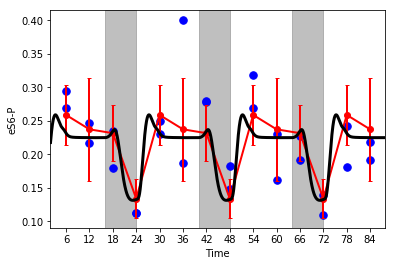

In [8]:
fm.PlotModels_Fig1(WTLD_sim,data_code="WTLD")

Note that the early-day peak seen in normal conditions above is linked to cycling behavior in the constant light conditions below

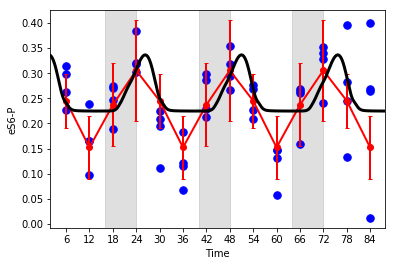

In [9]:
fm.PlotModels_Fig1(WTLL_sim,data_code="WTLL")

Finally, in the absence of normal clock function, light alone drives cycling behavior during they day

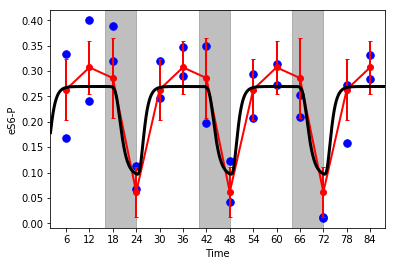

In [10]:
fm.PlotModels_Fig1(CCA1_sim,data_code="CCA1")

In spite of the underlying variance in the observational data, our models capture the qualitative behavior of eS6-P across all conditions, demonstrating that eS6-P cycling is driven by both the circadian clock and light cycle, in conjunction and seperately. Furthermore, the models capture the shift in peak eS6-P towards subjective night under constant light conditions

## 3. eS6-P Changes in Response to Changing Time of Dawn and Dusk

We next focused on the dynamics of our models after dawn, where we observe a peak in eS6-P. To do this, we looked at the effect of varying the night-to-day and day-to-night transitions, reflecting how changes in the local environment (weather) might affect the perception of day length by the plant. 

To do this, we created a model where light cycle (which is included in the clock module) can be adjusted on day 10 to alter the time of dawn relative to a 12 hour light, 12 hour dark day.

In [11]:
### Load Model

dawn_var_model='''
    import "clock_4comp_rpr_WTDawnVar95.antimony"
    import "model_rps6_4comp.antimony"
'''

rps6_dawn_var_model = fm.load_model(dawn_var_model,parameter_dict)

In addition to the parameters described in Section 1, we also need to provide a list of shifts to describe how the dawn time changes. The plotting function uses this information to simulate the model under each shift condition. The color corresponds to the shift in dawn (purpler indicates earlier than expected, yellow indicates later than expected). The short lines at the bottom of the figure indicate the dawn time. Light blue circles show the peak, early-day eS6-P position.

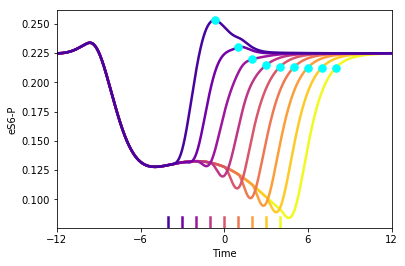

In [12]:
shifts = [-4.0,-3.0,-2.0,-1.0,0.001,1.0,2.0,3.0,4.0]
fm.PlotModelsOverTime(rps6_dawn_var_model,shifts,parameter_dict)

Shfiting the dawn earlier in the day induces a peak in eS6-P while shifting the dawn later creates a trough. We theorize that these different effects are the result of the how the circadian clock interacts with the light cycle. The function below uses the same module to plot eS6-P under a normal 12-12 day, and with a dawn shift of +/- 4 hours. Below is a figure of the circadian clock under the same conditions (red = CCA1/LHY, orange = PRR9/7, green = PRR5/1, and blue = EC)

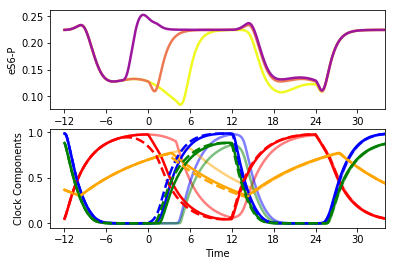

In [13]:
shifts = [-4.0,0.001,4.0]
plt.subplot(2, 1, 1)
fm.PlotModelsOverTime_Long(rps6_dawn_var_model,shifts,parameter_dict)
plt.subplot(2, 1, 2)
fm.PlotModelsOverTime_Long_Clock(rps6_dawn_var_model,shifts,parameter_dict)

As the time of dawn moves, so does the the point at which CCA1/LHY (a eS6-P promoting factor) peaks relative to PRR9/7 (a eS6-P inhibitory factor). To further explore the effect which changing light conditions has on the early day peak, we modified our model to look at the combined effects of shifting both the timing of dusk and dawn. Color indicates the total effect of the shifts on the length of night (purple = later dusk + ealrlier dawn = shorter night, yellow = earlier dusk + later dawn = longer night)

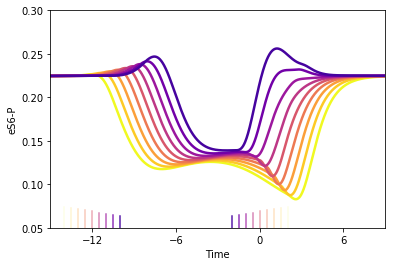

In [14]:
dusk2dawn_var_model='''
    import "clock_4comp_rpr_WTDuskToDawnVar.antimony"
    import "model_rps6_4comp.antimony"
'''

rps6_dusk2dawn_var_model = fm.load_model(dusk2dawn_var_model,parameter_dict)

shifts = [-2.0,-1.5,-1.0,-0.5,0.001,0.5,1.0,1.5,2.0]
fm.PlotModelsOverTime_DuskAndDawn(rps6_dusk2dawn_var_model,shifts,parameter_dict)

As with shifting the time dawn of, moving both the dawn and dusk time in conjunction induces either a peak or trough in eS6-P depending on the total effect on the length of the night, that is not seen when either change is considered alone (see the models below)

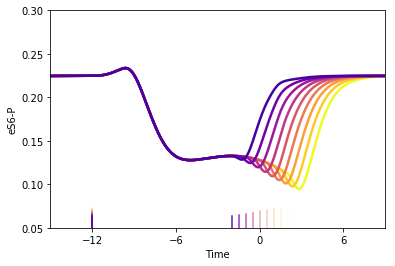

In [15]:
dusk2dawn_var_model='''
    import "clock_4comp_rpr_WTDuskToDawnVar_NULLDusk.antimony"
    import "model_rps6_4comp.antimony"
'''

rps6_dusk2dawn_var_model = fm.load_model(dusk2dawn_var_model,parameter_dict)

shifts = [-2.0,-1.5,-1.0,-0.5,0.001,0.5,1.0,1.5,2.0]
fm.PlotModelsOverTime_DuskAndDawn(rps6_dusk2dawn_var_model,shifts,parameter_dict,null_model="Dusk")

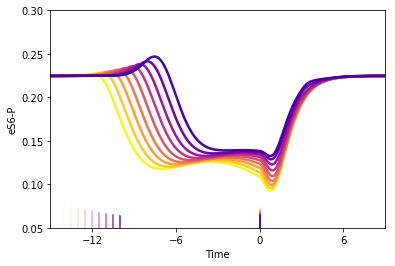

In [16]:
dusk2dawn_var_model='''
    import "clock_4comp_rpr_WTDuskToDawnVar_NULLDawn.antimony"
    import "model_rps6_4comp.antimony"
'''

rps6_dusk2dawn_var_model= fm.load_model(dusk2dawn_var_model,parameter_dict)

shifts = [-2.0,-1.5,-1.0,-0.5,0.001,0.5,1.0,1.5,2.0]
fm.PlotModelsOverTime_DuskAndDawn(rps6_dusk2dawn_var_model,shifts,parameter_dict,null_model="Dawn")

## 4. eS6 Phosphorylation in Response to Changing Seasonal Changes

While the transient changes in dawn and dusk time indicate the sensitivity of the eS6-P model to variation in the light-dark cycle, it does not reflect the sort of slow, progressive changes observed in seasonal changes in the daylength. To investigate this, we used a solar calculator provided by National Oceanic and Atmospheric Administration (NOAA) to generate a data set of ‘ideal’ (i.e. unaffected by transient local changes) daylengths (https://www.esrl.noaa.gov/gmd/grad/solcalc/calcdetails.html). These ideal daylengths calculations were used to fit a modified light-dark cycle which varies over a simulated 365 day year

In [17]:
noaa_var_file='''
    import "clock_4comp_rpr_NOAAVar95.antimony"
    import "model_rps6_4comp.antimony"
'''

noaa_var_model = fm.load_model(noaa_var_file,parameter_dict)

We used this data to simulate eS6-P under two extremes in the day/night cycle within the range of A. thaliana: Oslo, Norway and Paria Cape Verde

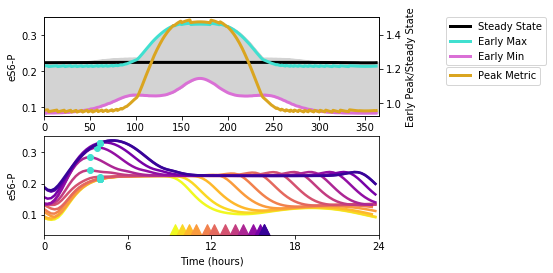

In [18]:
plt.subplot(2, 1, 1)
fm.PlotYearlyData(noaa_var_model,parameter_dict,"Oslo")
plt.subplot(2, 1, 2)
fm.PlotDailyData(noaa_var_model,parameter_dict,"Oslo")

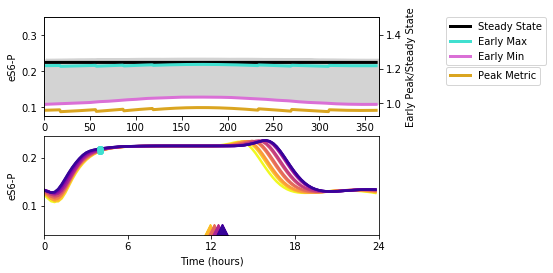

In [19]:
plt.subplot(2, 1, 1)
fm.PlotYearlyData(noaa_var_model,parameter_dict,"Paria")
plt.subplot(2, 1, 2)
fm.PlotDailyData(noaa_var_model,parameter_dict,"Paria")

As we would expect from the previous results, we observe greater variation in eS6-P maximum and minimum values in Oslo (where days vary from ~6 to ~19 hours of light), compared to Paria (where days vary from ~11 to ~13 hours of light). This is further reflected in the peak metric (the ratio of early day peak height to saturating eS6-P value at the end of the day), which only exceeded 1 in Oslo.

However, these ideal curves only account for seasonal changes in the day-night cycle, missing transient variations due to factors like weather. So we also included a model based on downard angled photosynthetic radiation from the Harvard Forest and compared it to an ideal model of day-length variation in Boston, Massachusetts.

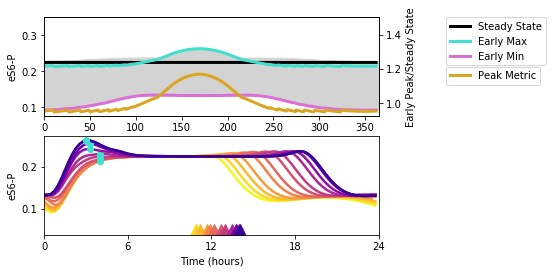

In [20]:
plt.subplot(2, 1, 1)
fm.PlotYearlyData(noaa_var_model,parameter_dict,"Boston")
plt.subplot(2, 1, 2)
fm.PlotDailyData(noaa_var_model,parameter_dict,"Boston")

In [21]:
hf_var_file='''
    import "Clock_4compRPR_p95_HF102_2006_SplineModel.antimony"
    import "model_rps6_4comp.antimony"
'''

hf_var_model = fm.load_model(hf_var_file,parameter_dict)

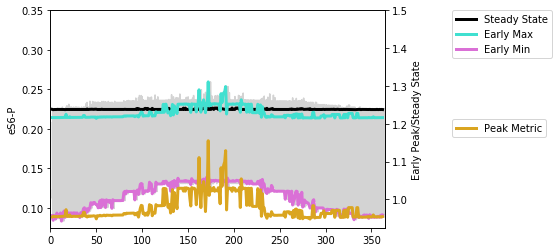

In [22]:
fm.PlotYearlyData_HF(hf_var_model,noaa_var_model,parameter_dict)

Using Harvard Forest data, we still observe changes in maximum and minmum values of eS6-P, though the changes in peak height are more constrained compared to the ideal day lengths. The effects of random fluctuations in the day-length can be seen by comparing the peak metric between the Harvard Forest and NOAA data. Peak metric values are binned by day-length with an interval of 30 minutes.

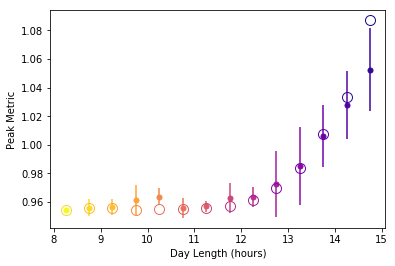

In [23]:
fm.PlotBinnedPeakMetric(hf_var_model,noaa_var_model,parameter_dict)

The difference in peak metric between Harvard Forest and idealized day-lengths over similar length days indicates that the stability of day-length variation does effect the early day peak response in eS6-P.

## 5. Genes with eS6 like phase regression

Finally, we identified genes in A. thaliana genes with behavior similar to eS6. We began with a set of circadian clock and light-cycle regulated genes from Dalchau et al. (2010, PNAS) and selected those with a similar day-to-night shift peak between longday (LD) and constant light (LL) conditions as well as broad peak of expression in CCA1 overpexression mutants.

As expected our selected genes have a strong bias phase difference between LD and LL compared to all Dalchau genes.

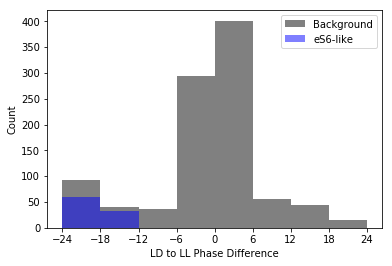

In [24]:
fm.PlotHistogram('CombinedDalchau_SelectPhaseDiffs.txt','CombinedDalchau_AllPhaseDiffs.txt',[-24, -18, -12, -6, 0, 6, 12, 18, 24],"LD to LL Phase Difference")

We then plot the expression profile of our selected eS6-like genes in each condition. Colored curves are individual, eS6-P like genes, the black curve is their average expression, and the dotted black line is the overall average expression of the group. Clock Dominated genes are in blue, Clock-light Coregulated genes are red.

LD data comes from  the Diurnal database (http://diurnal.mocklerlab.org/diurnal_data_finders/new)

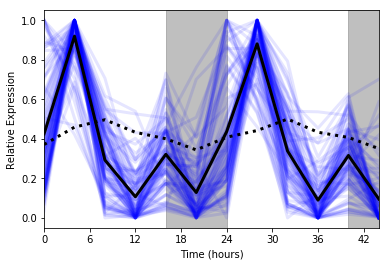

In [25]:
fm.PlotExpressionVectors("CombinedDalchau_Select.diurnal_data.tab","CombinedDalchau_All.diurnal_data.tab",[0,4,8,12,16,20,24,28,32,36,40,44])

LL data comes Edwards et al. (2006, Plant Cell) available at http://millar.bio.ed.ac.uk/data.htm

First, we need to filter genes from the full data set:

In [26]:
fm.FilterLLData("Rhythmic.txt","SelectDalchauGenes.txt","LL_Select.filtered.out")
fm.FilterLLData("Rhythmic.txt","AllDalchauGenes.txt","LL_All.filtered.out")

Then we can plot our genes

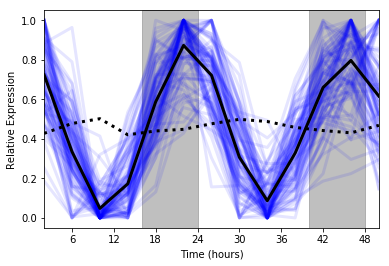

In [27]:
fm.PlotExpressionVectors("LL_Select.filtered.out","LL_All.filtered.out",[2,6,10,14,18,22,26,30,34,38,42,46,50])

We will go through the same process the CCA1-overexpression data from Missra et al. (2015, Plant Cell)

In [28]:
fm.FilterCCA1Data("CCA1ExpressionData.txt","SelectDalchauGenes.txt","CCA1_Select.filtered.out")
fm.FilterCCA1Data("CCA1ExpressionData.txt","AllDalchauGenes.txt","CCA1_All.filtered.out")

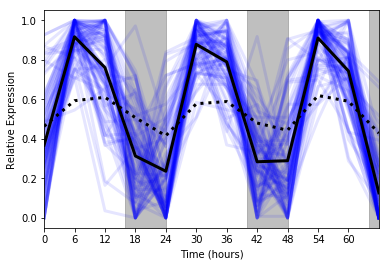

In [29]:
fm.PlotExpressionVectors("CCA1_Select.filtered.out","CCA1_All.filtered.out",[0,6,12,18,24,30,36,42,48,54,60,66])

As expected, eS6-like genes show a profile similar to the phosphorylation of eS6. What is noteable, however, is that these patterns are distinct from the background expression of all Dalchau genes. In the case of CCA1, Dalchau genes overall show bias towards broad expression during the day, but the amplitude is much smaller than the genes we selected. We compared the average day and night expression under CCA1 conditions and found that the background distribution is by bimodal with a positive (day > night) and negative (night > day) peak, with eS6-like genes being enriched among the most extreme end of the positive peak.

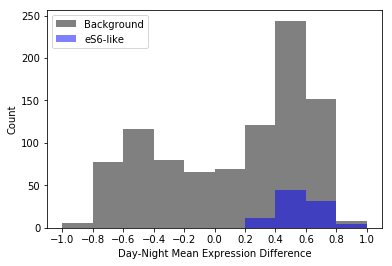

In [30]:
fm.PlotHistogram('CombinedDalchau_DayNightDiffCCA1_Select.out','CombinedDalchau_DayNightDiffCCA1_All.out',[-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0],"Day-Night Mean Expression Difference")

Importantly, while these results do not indicate a causal relationship between the regulation of eS6-P and the regulation of these genes, it does suggest that the type of clock/light regulation we observe in eS6-P may be broadly employed by A. thaliana

## References

Dalchau N, Hubbard KE, Robertson FC, Hotta CT, Briggs HM, et al. (2010) Correct biological timing in Arabidopsis requires multiple light-signaling pathways. Proc Natl Acad Sci U S A 107: 13171-13176.

Edwards KD, Anderson PE, Hall A, Salathia NS, Locke JCW, et al. (2006) FLOWERING LOCUS C mediates natural variation in the high-temperature response of the Arabidopsis circadian clock. The Plant Cell 18: 639-650.

Missra A, Ernest B, Lohoff T, Jia Q, Satterlee J, et al. (2015) The circadian clock modulates global daily cycles of mRNA ribosome loading. The Plant Cell 27: 2582-2599.